In [129]:
import pandas as pd
data = pd.read_csv(r"C:\Users\rayan\Downloads\List_Of_Loose_Fill_Asbestos_Insulation_Affected_Residential_Premises_20250117.csv")
print(data.head())

import dash
from dash import dcc, html
import io
import base64
import plotly.express as px

#convert matplotlib plots to dash compatible images
def matplotlib_to_dash(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format="png")
    buf.seek(0)
    encoded_image = base64.b64encode(buf.read()).decode()
    buf.close()
    return f"data:image/png;base64,{encoded_image}"

  Division Name  Section  Block Unit Street Number Street Name Street Type  \
0       AINSLIE       21      2  NaN            71       Ebden      Street   
1       AINSLIE       21     30  NaN            28         Cox      Street   
2       AINSLIE       21      7    1           61A       Ebden      Street   
3       AINSLIE       34     12  NaN            48      Cowper      Street   
4       AINSLIE       63      8  NaN            34    Chisholm      Street   

  Alternate Street Number Alternate Street Name Alternate Street Type  \
0                     NaN                   NaN                   NaN   
1                     NaN                   NaN                   NaN   
2                     NaN                   NaN                   NaN   
3                     NaN                   NaN                   NaN   
4                     NaN                   NaN                   NaN   

  Alternate Division Name Date added to Register Date removed from Register  
0             

In [110]:
print(data.shape)

(1029, 13)


In [111]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Division Name               1029 non-null   object
 1   Section                     1029 non-null   int64 
 2   Block                       1029 non-null   int64 
 3   Unit                        18 non-null     object
 4   Street Number               1029 non-null   object
 5   Street Name                 1029 non-null   object
 6   Street Type                 1029 non-null   object
 7   Alternate Street Number     149 non-null    object
 8   Alternate Street Name       149 non-null    object
 9   Alternate Street Type       149 non-null    object
 10  Alternate Division Name     1 non-null      object
 11  Date added to Register      1029 non-null   object
 12  Date removed from Register  1011 non-null   object
dtypes: int64(2), object(11)
memory usage: 104.6+ KB


In [112]:
print(data.isnull().sum)

<bound method DataFrame.sum of       Division Name  Section  Block   Unit  Street Number  Street Name  \
0             False    False  False   True          False        False   
1             False    False  False   True          False        False   
2             False    False  False  False          False        False   
3             False    False  False   True          False        False   
4             False    False  False   True          False        False   
...             ...      ...    ...    ...            ...          ...   
1024          False    False  False   True          False        False   
1025          False    False  False   True          False        False   
1026          False    False  False   True          False        False   
1027          False    False  False   True          False        False   
1028          False    False  False  False          False        False   

      Street Type  Alternate Street Number  Alternate Street Name  \
0          

In [113]:
data = data.drop_duplicates()

In [114]:
print(data.describe())

           Section        Block
count  1029.000000  1029.000000
mean     58.801749    13.526725
std      88.945998    11.069137
min       0.000000     1.000000
25%      15.000000     6.000000
50%      31.000000    11.000000
75%      51.000000    19.000000
max     493.000000   124.000000


General Trends

In [116]:
#How many properties are registered?
all_properties = data['Unit'].isna().sum()
print(f"The total number of properties: {all_properties}")
#How many properties remain on the register as of now?
remaining_properties = data['Date removed from Register'].isna().sum()
print(f"Number of properties still on the register: {remaining_properties}")

The total number of properties: 1011
Number of properties still on the register: 18


Distribution of properties across divisions: Division Name
KAMBAH           102
CURTIN            41
PEARCE            36
FARRER            34
WESTON            32
                ... 
COREE              1
TENNENT            1
NICHOLLS           1
BARTON             1
JERRABOMBERRA      1
Name: count, Length: 62, dtype: int64


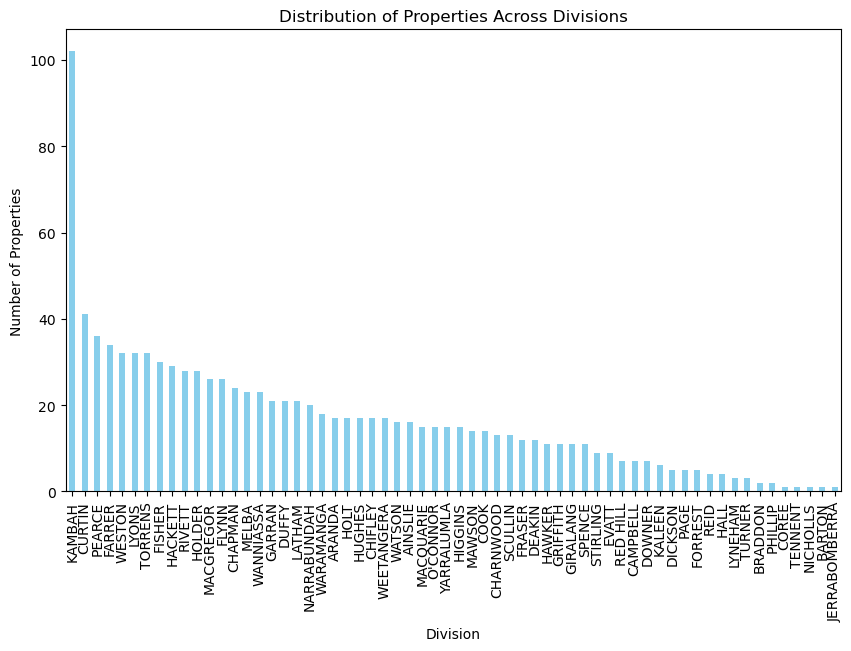

In [145]:
#What is the distribution of affected properties across divisions?
division_distribution = data['Division Name'].value_counts()
print(f"Distribution of properties across divisions: {division_distribution}")
fig1 = plt.figure(figsize=(10, 6))
division_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Properties Across Divisions')
plt.xlabel('Division')
plt.ylabel('Number of Properties')
#plt.xticks(rotation=45)
#plt.tight_layout()
division_plot = matplotlib_to_dash(fig1)                   


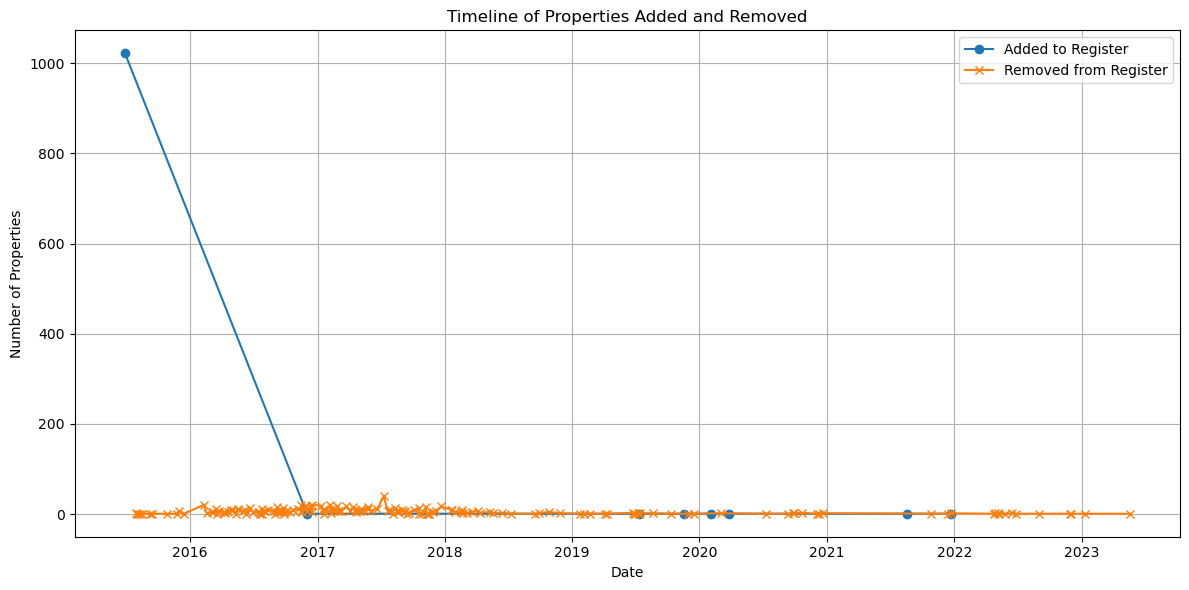

In [135]:
# What is the timeline for properties being added to or removed from the register?
#convert to datetime
data['Date added to Register'] = pd.to_datetime(data['Date added to Register'], errors='coerce')
data['Date removed from Register'] = pd.to_datetime(data['Date removed from Register'], errors='coerce')

#count occurrence of dates
added_timline = data['Date added to Register'].value_counts().sort_index()
removed_timline = data['Date removed from Register'].value_counts().sort_index()

#plot timelines
import matplotlib.pyplot as plt

fig2 = plt.figure(figsize=(12, 6))
plt.plot(added_timline, label='Added to Register', marker='o')
plt.plot(removed_timline, label='Removed from Register', marker='x')
plt.title('Timeline of Properties Added and Removed')
plt.xlabel('Date')
plt.ylabel('Number of Properties')
plt.legend()
plt.grid()
plt.tight_layout()
timeline_plot = matplotlib_to_dash(fig2)         


In [ ]:
#Do certain street types (e.g., Avenue vs. Road) have more affected properties?
street_type_distribution = data['Street Type'].value_counts()
print(f"Distribution of properties by street type: {street_type_distribution}")
fig3 = plt.figure(figsize=(10, 6))
street_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Affected Properties by Street Type')
plt.xlabel('Street Type')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.tight_layout()
street_type_plot = matplotlib_to_dash(fig3)
           
           

Average time on the register:  658.46 days


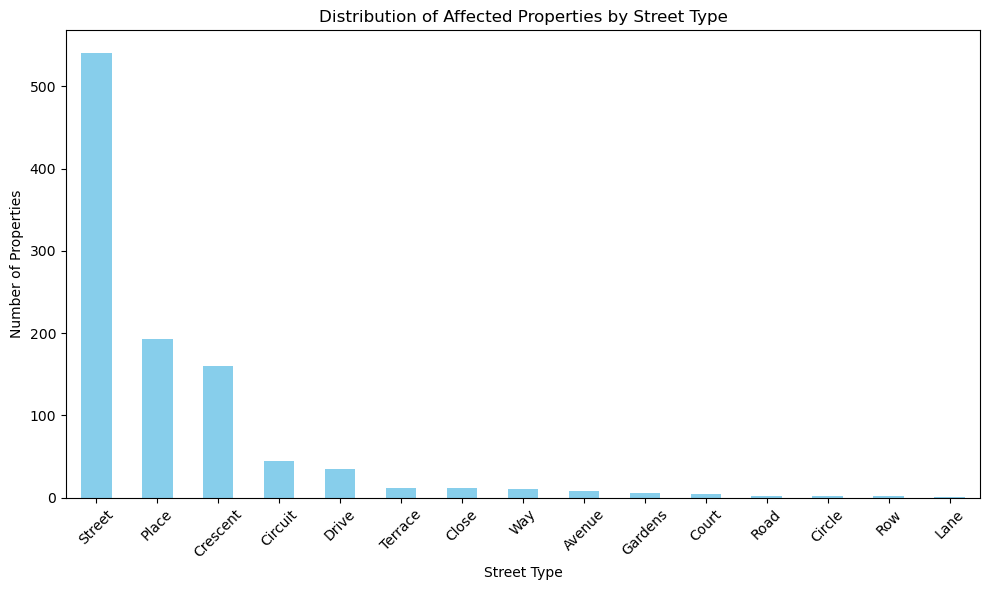

In [139]:
#What is the average time a property stays on the register?

#calculate duration in days
data['days on register'] = (data['Date removed from Register'] - data['Date added to Register']).dt.days

#calculate the average time
average_days = data['days on register'].mean()

print(f"Average time on the register: {average_days: .2f} days")

fig3 = plt.figure(figsize=(10, 6))
street_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Affected Properties by Street Type')
plt.xlabel('Street Type')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.tight_layout()
street_type_plot = matplotlib_to_dash(fig3)


In [147]:


# Create a Dash app

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Mr. Fluffy Affected Properties Dashboard"),
    html.Div([
        html.H2("Distribution of Properties Across Divisions"),
        html.Img(src=division_plot)
    ]),
    html.Div([
        html.H2("Timeline of Properties Added and Removed"),
        html.Img(src=timeline_plot)
    ]),
    html.Div([
        html.H2("Distribution of Affected Properties by Street Type"),
        html.Img(src=street_type_plot)
    ])
])

#run app
if __name__ == "__main__":
    app.run_server(debug=True)